In [1]:
import numpy as np
import pandas as pd
from scipy.sparse import coo_matrix, load_npz, save_npz
import skimage.io
import matplotlib.pyplot as plt
import os

In [ ]:
coo_list = np.load('B2A3_label_image_truncated.npz', allow_pickle=True)['arr_0']

In [8]:
np.all(coo_list[1].toarray() == coo_list[10].toarray()) 

IndexError: index 10 is out of bounds for axis 0 with size 6

In [15]:
coo_list.shape

(67,)

In [11]:
np.load('B2A3_label_image_truncated.npz', allow_pickle=True)['arr_0'].shape

(72,)

In [13]:
temp_coo = [coo_list[0] for d in range(67)]
np.savez('B2A3_label_image_truncated_2.npz', temp_coo)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


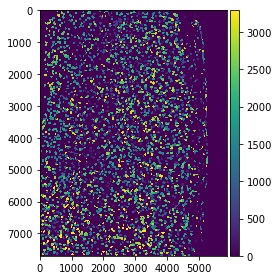

In [21]:
skimage.io.imshow(coo_list[0].toarray())

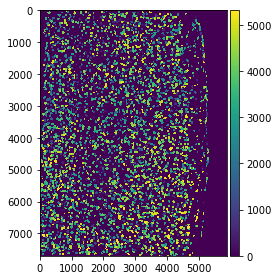

In [22]:
skimage.io.imshow(coo_list[40].toarray())

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


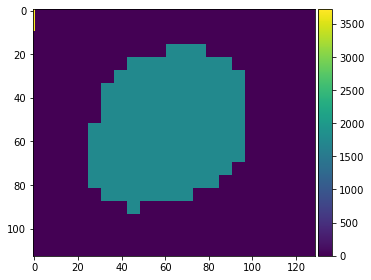

In [58]:
_img = coo_list[40].toarray()
_img = _img[2154:2267 ,1333:1462]
skimage.io.imshow(_img)

In [57]:
_iss_spots = pd.read_csv(os.path.join('pciSeq', 'data', 'B2A3', 'truncated_data', 'B2A3_spots_truncated.csv'))
mask_x = (_iss_spots.x < 1462) & (_iss_spots.x > 1333)
mask_y = (_iss_spots.y < 2267) & (_iss_spots.y > 2154)
mask = mask_x & mask_y
_iss_spots = _iss_spots[mask]

In [75]:
_iss_spots.x = _iss_spots.x - 1333
_iss_spots.y = _iss_spots.y - 2154

In [43]:
_iss_spots.z.max()

64.61900869732854

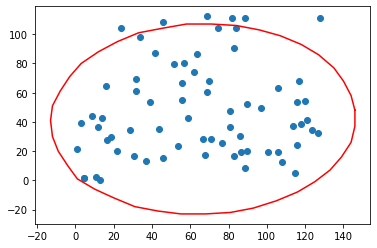

In [94]:
plt.scatter(_iss_spots.x, _iss_spots.y)
# skimage.io.imshow(_img)
eclipse_coords = [[146, 48], [144, 58], [140, 68], [135, 77], [127, 86], [118, 93], [107, 99], [96, 103], [84, 106], [71, 107], [58, 107], [45, 104], [33, 101], [22, 95], [12, 88], [3, 80], [-3, 71], [-8, 61], [-12, 51], [-13, 41], [-12, 30], [-9, 20], [-4, 10], [1, 1], [10, -6], [20, -12], [31, -18], [43, -21], [55, -23], [68, -23], [81, -22], [93, -19], [105, -14], [116, -8], [125, -1], [133, 7], [139, 16], [144, 26], [146, 37], [146, 48]]
xs, ys = zip(*eclipse_coords) 
plt.plot(xs, ys, 'red') 
plt.show()

In [64]:
small_coo = [coo_matrix(_img) for i in range(65)]
np.savez('small_coo_from_page40.npz', small_coo)

In [48]:
_iss_spots.to_csv('small_spots.csv', index=False)

In [62]:
np.unique(_img)

array([   0, 1764], dtype=uint32)

In [65]:
_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)

In [70]:
save_npz('page_40.npz', coo_matrix(_img))

In [77]:
_iss_spots[['x', 'y', 'Gene']].to_csv('small_spots_2d.csv', index=False)

In [76]:
_iss_spots

,y,x,z,Gene
262260,21.33114,0.726932,4.498009,Cnr1
262301,87.33114,41.726932,4.498009,Id2
262304,15.33114,45.726932,4.498009,Slc6a1
262332,68.33114,69.726932,4.498009,Wfs1
262349,47.33114,80.726932,4.498009,Id2
...,...,...,...,...
285269,37.33114,113.726932,58.606909,Thsd7a
285270,5.33114,114.726932,58.606909,Cxcl14
287094,0.33114,12.726932,64.619009,Kctd12
287106,104.33114,23.726932,64.619009,Vip
